In [1]:
from CreatePricesDf_new import CreatePricesDf
import matplotlib.pyplot as plt
import numpy as np

Creation of dataframe Using modified CreatPricesDf()

In [2]:
df_prices = CreatePricesDf()

Average energy price by year grouped into regions DK1 and DK2

In [3]:
avg_year_cost_DK1 = df_prices.loc[df_prices["PriceArea"]=="DK1"].groupby(df_prices["HourDK"].dt.year)["SpotPriceDKK"].mean()

avg_year_cost_DK2 = df_prices.loc[df_prices["PriceArea"]=="DK2"].groupby(df_prices["HourDK"].dt.year)["SpotPriceDKK"].mean()

AttributeError: 'tuple' object has no attribute 'loc'

Figure comparing the difference in average price by year for regions DK1 and DK2

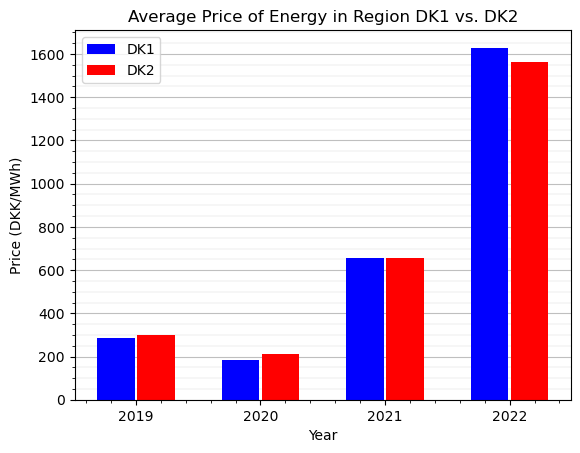

In [ ]:
#X-axis is being defined for the specified years range
Years = ['2019', '2020', '2021', '2022']
Years_Axis = np.arange(len(Years))

fig, ax = plt.subplots()

#Years axis is being shifted to account for just over half of the bar width
ax.bar(Years_Axis - 0.16, avg_year_cost_DK1.values, width = 0.30, label = "DK1" , color = 'b')
ax.bar(Years_Axis + 0.16, avg_year_cost_DK2.values, width = 0.30, label = "DK2", color = 'r')

plt.xticks(Years_Axis, Years)

#Create specific background line pattern with major and minor lines
ax.set_axisbelow(True)
ax.grid(which='major', axis = 'y', linewidth=0.8, alpha=0.8)
ax.grid(which='minor', axis = 'y', linewidth=0.2, alpha=0.8)
ax.minorticks_on()

plt.xlabel("Year")
plt.ylabel("Price (DKK/MWh)")
plt.title("Average Price of Energy in Region DK1 vs. DK2")
plt.legend()
plt.show()

# Discussion of Findings 1.1

The energy price (DKK/MWh) has more than quadrupled since 2019. Overall, although there was a slight decrease in prices from 2019 to 2020, it is clear prices have been trending upwards. 2021 marked a dramatic increase from the previous two years, energy went from 186 DKK/MWh to 655 DKK/MWh in region DK1. That increase only continued into 2022 when again the price jumped from 655 to 1629 in region DK1. Both region DK1 and DK2 have shown this trend. Historically in 2019, 2020, and 2021 the price for energy in DK2 has been greater than that in DK1. But for the first time the price in DK1 is now greater at 1629 where DK2 is pricing in at 1563. Even though the increase in has been extreme both regions have a very similar pricing change as can be seen in Figure 1 ("Average Price of Energy in Region DK1 vs. DK2")

Average energy price for regions DK1 and DK2 grouped and average by hour of day

In [ ]:
#grouby function is applied to the loc of DK1 and DK2 and then averaged
avg_hour_cost_DK1 = df_prices.loc[df_prices["PriceArea"]=="DK1"].groupby(df_prices["HourDK"].dt.hour)["SpotPriceDKK"].mean()

avg_hour_cost_DK2 = df_prices.loc[df_prices["PriceArea"]=="DK2"].groupby(df_prices["HourDK"].dt.hour)["SpotPriceDKK"].mean()

Historically highest and lowest hour price for regions DK1 and DK2

In [ ]:
hour_max_price_DK1 = avg_hour_cost_DK1.to_numpy().argmax()
hour_max_price_DK2 = avg_hour_cost_DK2.to_numpy().argmax()

hour_min_price_DK1 = avg_hour_cost_DK1.to_numpy().argmin()
hour_min_price_DK2 = avg_hour_cost_DK2.to_numpy().argmin()

Figure comparing the difference in average price by hour for regions DK1 and DK2

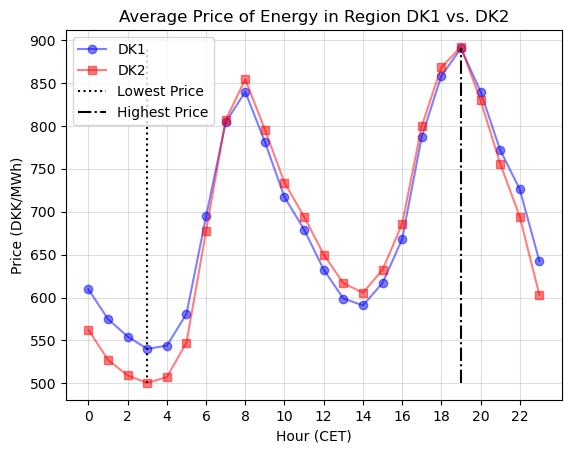

In [ ]:
#Create range of x-axis based on hours during day
hours = np.arange(len(avg_hour_cost_DK1))

#Change hour dataline to include every second number starting from 0 to make chart easier to read
plt.xticks(np.delete(hours, np.arange(-1, hours.size, 2)))

plt.plot(hours, avg_hour_cost_DK1, 'bo', linestyle='solid' ,label="DK1", alpha=0.5)
plt.plot(hours, avg_hour_cost_DK2, 'rs', linestyle='solid', label="DK2", alpha=0.5)

plt.grid(alpha = 0.4)

#vertical lines on max and min hour price overlaid on grid
plt.vlines(hour_min_price_DK1,avg_hour_cost_DK2.min() - 0.01, avg_hour_cost_DK1.max(), colors='black',linestyle='dotted', label='Lowest Price')
plt.vlines(hour_max_price_DK2,avg_hour_cost_DK2.min() - 0.01, avg_hour_cost_DK1.max(), colors='black',linestyle='dashdot', label='Highest Price')

plt.xlabel("Hour (CET)")
plt.ylabel("Price (DKK/MWh)")
plt.title("Average Price of Energy in Region DK1 vs. DK2")
plt.legend()
plt.show()

# Discussion of Findings 1.2

On average DK2 has had greater price volatility than DK1 over the course of a 24 hour period. DK2 experiences higher prices at the price peak and lower prices at the price low. Both charts share a common shape with high usage occuring at 8:00 & 19:00 and low usage at 3:00 & 14:00. The highest price hour for both sets of data is at 19:00 and the lowest usage is at 3:00. For DK1 the high usage price is 890 DKK/MWh and low usage price is 540 DKK/MWh. For DK2 the high usage price is 891 and the low usage price is 500.

Average spot price for each hour of day considering each of the 4 year of data

In [ ]:
#Data is first grouped into years and hours and then average
avg_hour_year_cost_DK2 = df_prices.loc[df_prices["PriceArea"]=="DK2"].groupby([df_prices["HourDK"].dt.year,df_prices["HourDK"].dt.hour]).mean()


C:\Users\birdl\AppData\Local\Temp\ipykernel_5512\3761391931.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_hour_year_cost_DK2 = df_prices.loc[df_prices["PriceArea"]=="DK2"].groupby([df_prices["HourDK"].dt.year,df_prices["HourDK"].dt.hour]).mean()


Figure comparing the difference in average price by hour for years 2019, 2020, 2021, and 2022 in region DK2

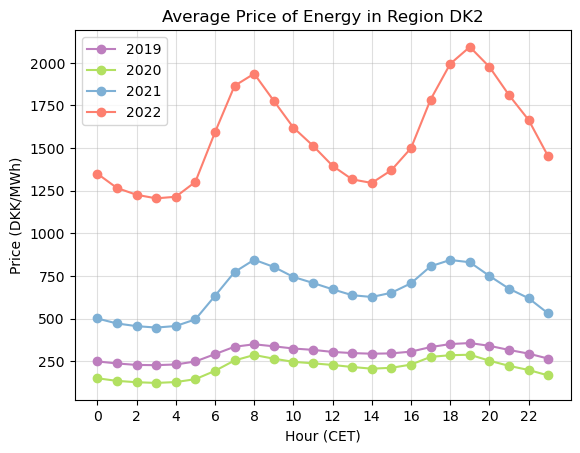

In [ ]:
plt.xticks(np.delete(hours, np.arange(-1, hours.size, 2)))

plt.grid(alpha = 0.4)

#Values for each year are based on the numpy matrix that is 96,1 where each index is a tuple of [year, index #] and each value is a list of [96,1] where each 24 values set is one year
plt.plot(hours, avg_hour_year_cost_DK2.values[0:24], 'o', color = '#bd7ebe', linestyle='solid' ,label=str(avg_hour_year_cost_DK2.index[0][0]))
plt.plot(hours, avg_hour_year_cost_DK2.values[24:48],'o', color = '#b2e061', linestyle='solid' ,label=str(avg_hour_year_cost_DK2.index[24][0]))
plt.plot(hours, avg_hour_year_cost_DK2.values[48:72], 'o', color = '#7eb0d5', linestyle='solid' ,label=str(avg_hour_year_cost_DK2.index[48][0]))
plt.plot(hours, avg_hour_year_cost_DK2.values[72:96], 'o', color = '#fd7f6f', linestyle='solid' ,label=str(avg_hour_year_cost_DK2.index[72][0]))

plt.xlabel("Hour (CET)")
plt.ylabel("Price (DKK/MWh)")
plt.title("Average Price of Energy in Region DK2")
plt.legend()
plt.show()

# Discussion of Findings 1.3

The results for region DK2 show a dramatic inrease in the price of energy. Although there was a slight drop in price, across the all hours, during 2020 that has since changed. The price of energy now in 2022 is far greater for all hours of the day than in 2019, 2020, and 2021. The daily variation in price is also far more extreme than any prevoius year. This is highly advantageous from a prosumer wth a battery system. The most recent year (2022) would be the most attrative for the use of a battery. Because the price of energy fluctuates to such extememes (2093 - 1205 DKK/MWh) thoughout the day a battery system could create substantial gains by buying at the low and selling at the peak.